In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot

## test regressor

In [2]:
test_ross = joblib.load('test_ross.pkl')

ross_data = test_ross['data']
ross_features = test_ross['features']
ross_target = test_ross['target']
ross_model = test_ross['rf_model']

#### (model: regression, feature_type: binary)

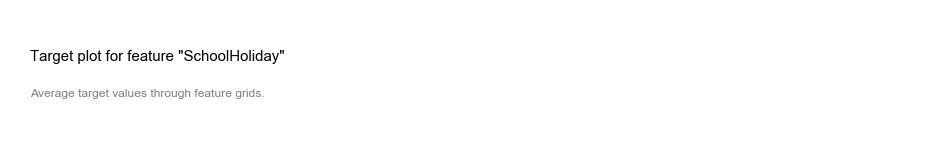

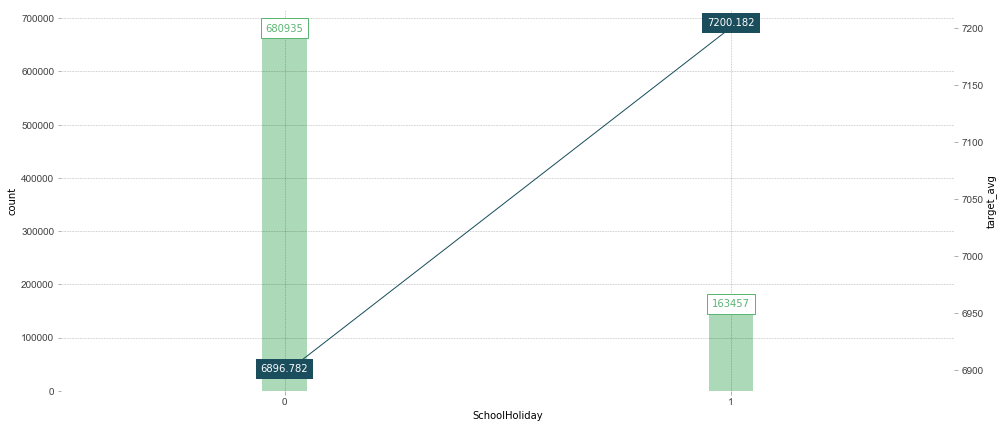

In [4]:
target_plot(df=ross_data, feature='SchoolHoliday', feature_name='SchoolHoliday', target='Sales')

#### (model: regression, feature_type: one-hot)

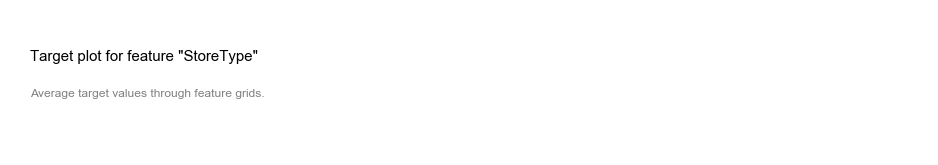

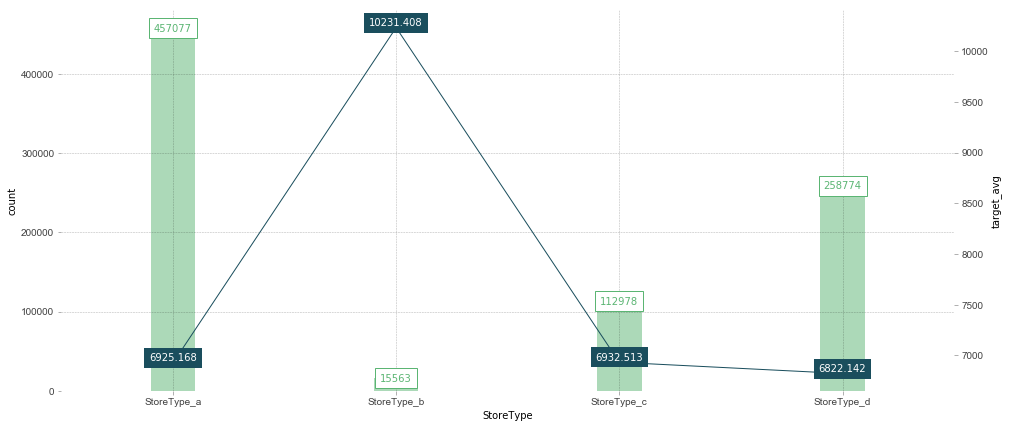

In [6]:
target_plot(df=ross_data, feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'],
            feature_name='StoreType', target='Sales')

#### (model: multi-class, feature_type: numeric)

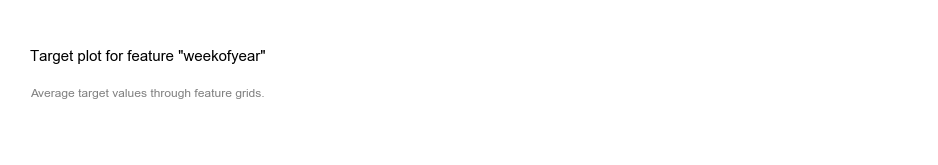

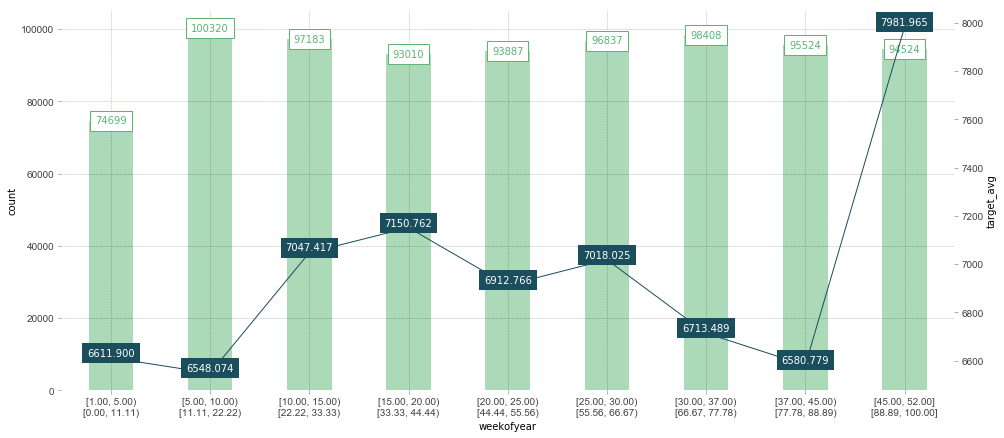

In [14]:
target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales')

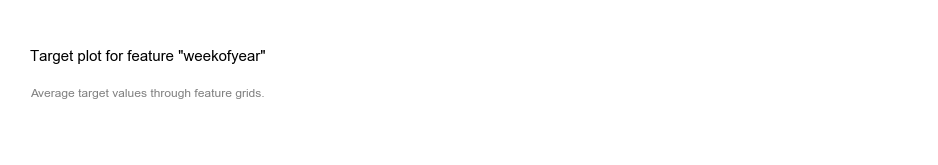

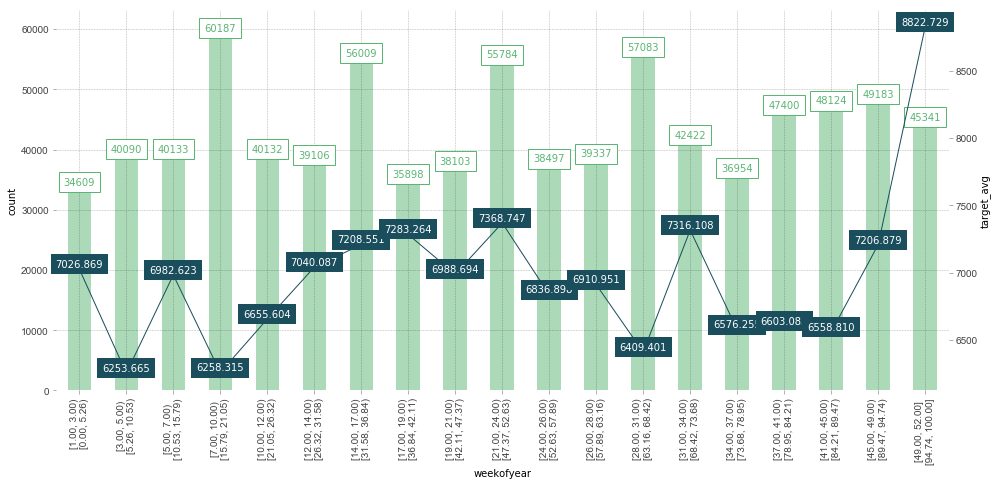

In [16]:
target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', 
            target='Sales', num_grid_points=20, plot_params={'xticks_rotation': 90})

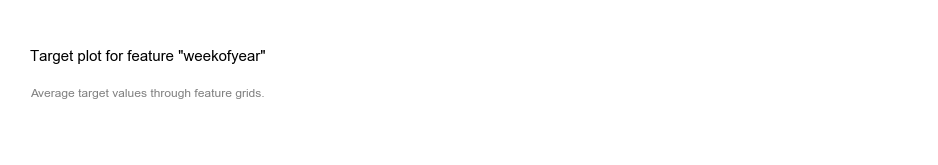

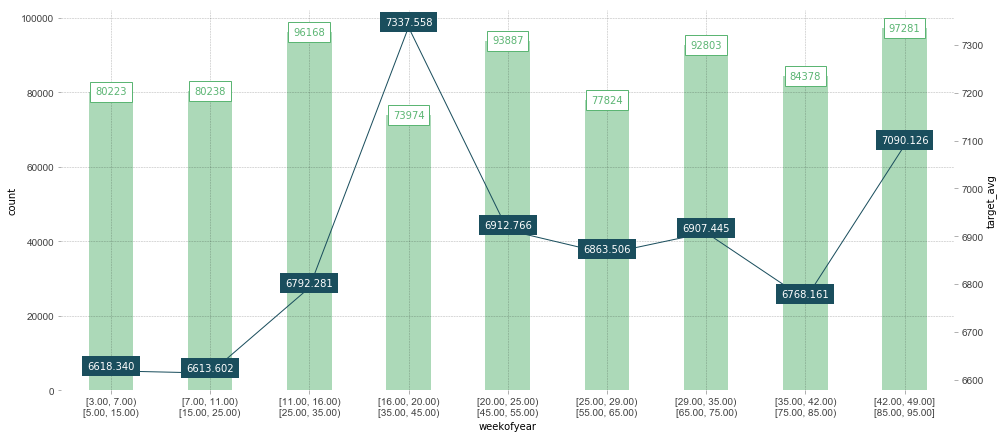

In [17]:
target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
            num_grid_points=10, grid_type='percentile', percentile_range=(5, 95))

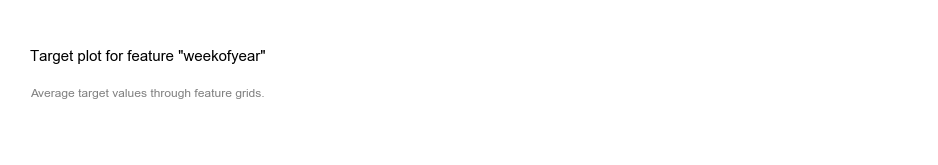

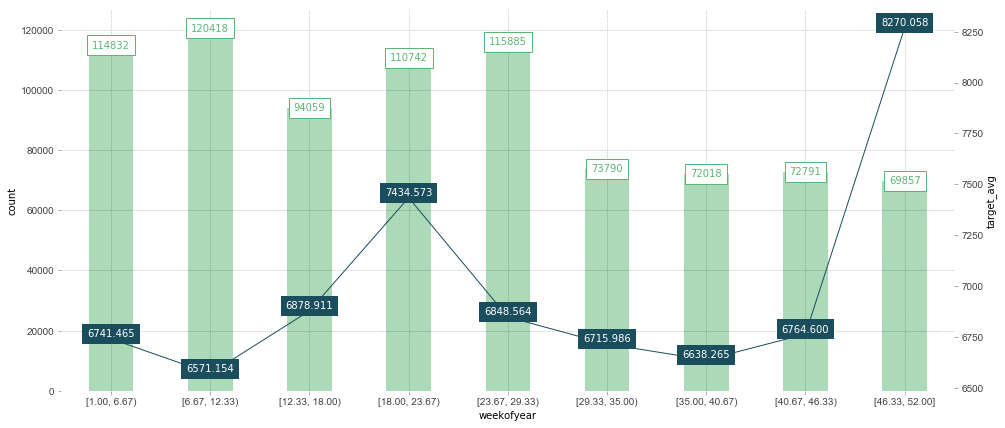

In [18]:
target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', num_grid_points=10, grid_type='equal')

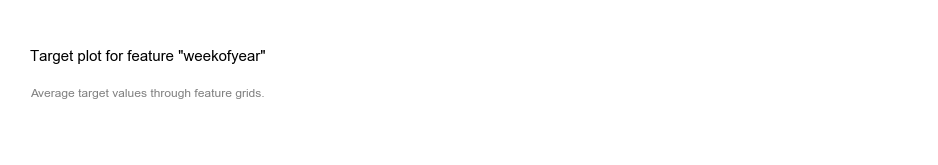

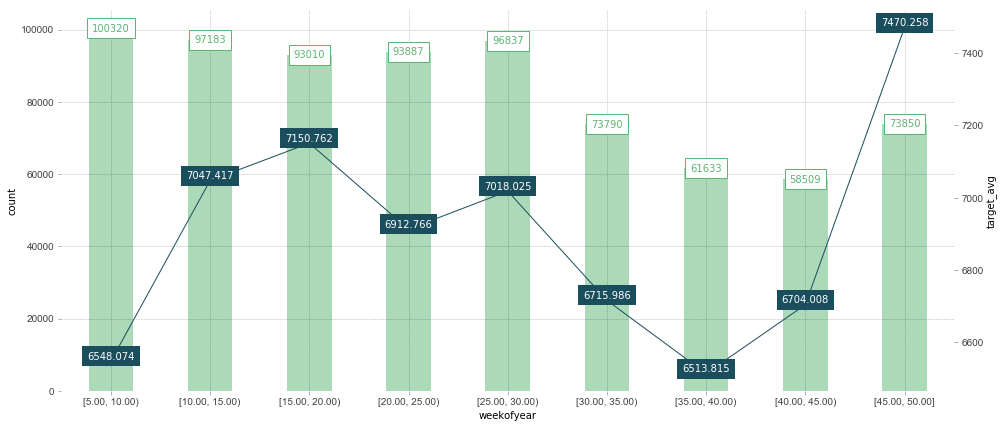

In [20]:
target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
            num_grid_points=10, grid_type='equal', grid_range=(5, 50))

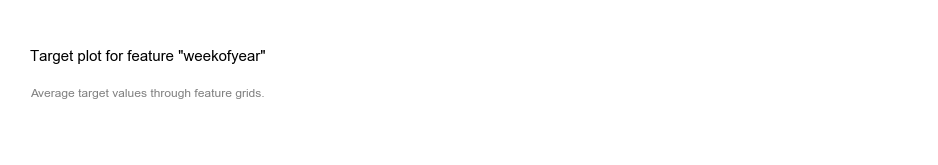

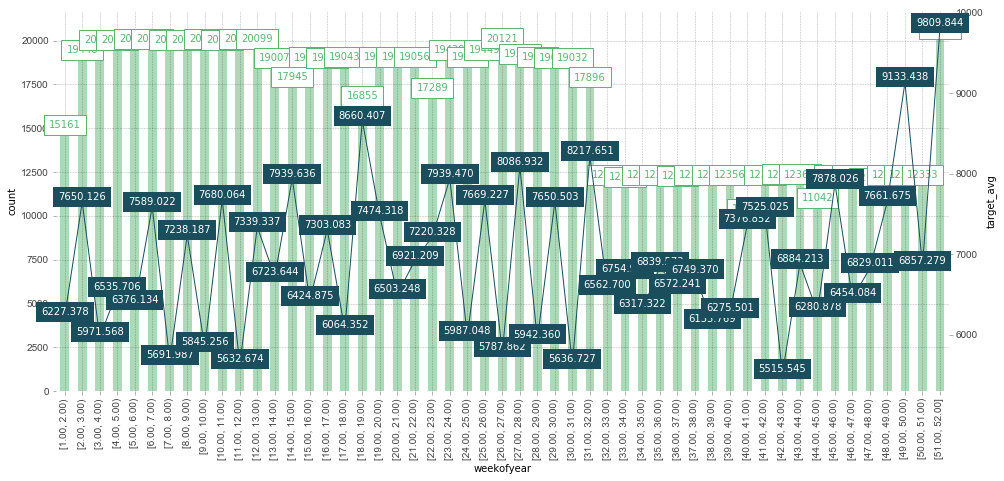

In [23]:
target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
            cust_grid_points=range(1, 53), plot_params={'xticks_rotation': 90})

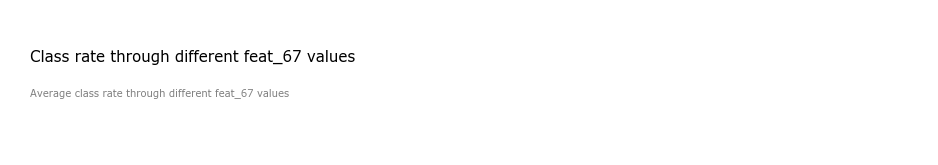

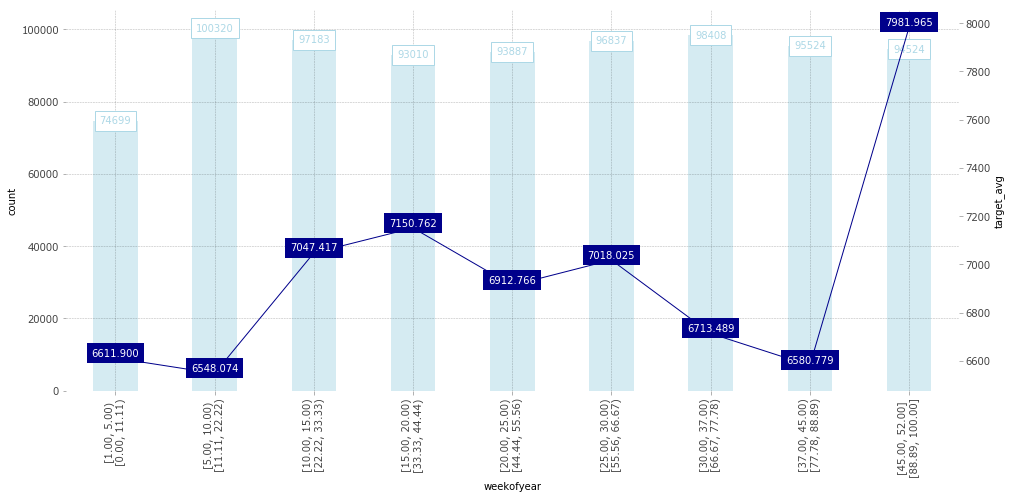

In [24]:
plot_params = {
    'font_family': 'Verdana',
    'title': 'Class rate through different feat_67 values',
    'subtitle': 'Average class rate through different feat_67 values',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'line_color': 'darkblue',
    'bar_color': 'lightblue',
    'line_width': 1,
    'xticks_rotation': 90
}
target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', plot_params=plot_params)